In [75]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [76]:
mnist = tf.keras.datasets.fashion_mnist

In [77]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [78]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


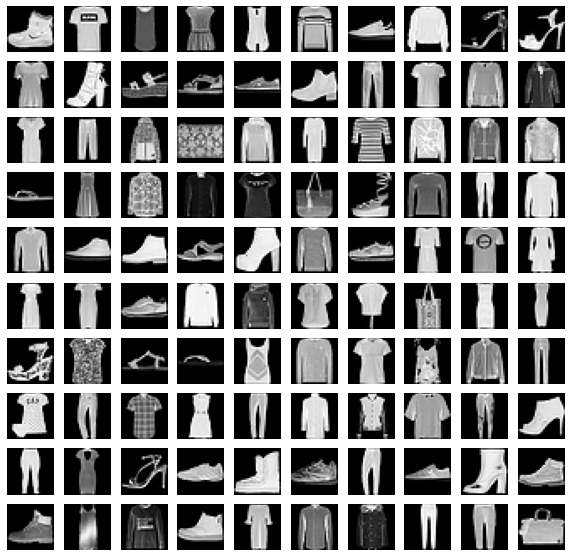

In [79]:
plt.figure(figsize = (10,10))
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap = 'gray')

In [80]:
X_train = X_train / 255

In [81]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train)
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

In [82]:
codings_size = 30

generator = keras.models.Sequential([
                  keras.layers.Dense(100, activation = 'selu', input_shape = [codings_size]),
                  keras.layers.Dense(150, activation = 'selu'),
                  keras.layers.Dense(28*28, activation = 'sigmoid'),
                  keras.layers.Reshape([28,28])
])

In [83]:
generator.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_13 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_14 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 136,634
Trainable params: 136,634
Non-trainable params: 0
_________________________________________________________________


In [84]:
discriminator = keras.models.Sequential([
                        keras.layers.Flatten(input_shape = [28,28]),
                        keras.layers.Dense(150, activation = 'selu'),
                        keras.layers.Dense(100, activation = 'selu'),
                        keras.layers.Dense(1, activation = 'sigmoid')
])

discriminator.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________


In [85]:
gan = keras.models.Sequential([generator, discriminator])
gan.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 28, 28)            136634    
_________________________________________________________________
sequential_7 (Sequential)    (None, 1)                 132951    
Total params: 269,585
Trainable params: 269,585
Non-trainable params: 0
_________________________________________________________________


In [86]:
discriminator.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop')
discriminator.trainable = False
gan.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop')

In [87]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    for X_batch in dataset:
      noise = tf.random.normal(shape = [batch_size, codings_size])
      generated_images = generator(noise)
      X_batch = tf.cast(X_batch, tf.float32)

      X_fake_and_real = tf.concat([generated_images, X_batch], axis = 0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_and_real, y1)

      noise = tf.random.normal(shape = [batch_size, codings_size])
      y2 = tf.constant([[1.]] * batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y2)


  plt.figure(figsize = (8,4))
  for i in range(32):
    plt.subplot(8,4,1+i)
    plt.axis('off')
    plt.imshow(generated_images[i], cmap = 'gray')

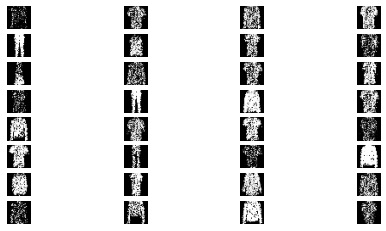

In [88]:
train_gan(gan, dataset, batch_size,codings_size, 10)

In [89]:
noise = tf.random.normal(shape = [100,codings_size])
generated_images = generator(noise)
generated_images.shape

TensorShape([100, 28, 28])

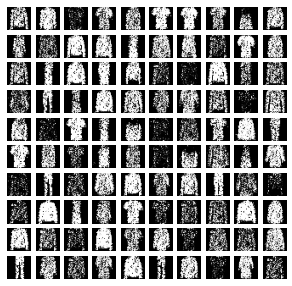

In [90]:
plt.figure(figsize = (5,5))
for i in range(100):
    plt.subplot(10,10,1+i)
    plt.axis('off')
    plt.imshow(generated_images[i], cmap = 'gray')